# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



/Users/runaljain/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [3]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [4]:
# Convert categorical features to category type
categorical_cols = ['store_primary_category', 'order_protocol', 'market_id']
for col in categorical_cols:
    df[col] = df[col].astype('category')




#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [5]:
# Calculate time taken in minutes
df['delivery_time_mins'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60.0
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_mins  
0                      21.0     34.44                47.0  
1                       2.0     27.60                44.0  
2                      18.0     11.56                55.0  
3                       8.0     31.80                59.0  
4                       7.0      8.20                46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [6]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)



In [7]:
# Drop unnecessary columns
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)
df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  delivery_time_mins  \
0                14.0                      21.0     34.44                47.0   
1                 2.0                       2.0     27.60                44.0   
2                 6.0                      18.0     11.56                55.0   
3                 6.0                       8.0     31.80                59.0   
4                 5.0                       7.0      8.20                46.0   

   order_hour  order_day_of_week  isWeekend  
0          22                  4          0  
1          21                  1          0  
2           0                  0          0  
3           3                  3          0  
4           2                  1          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [8]:
# Define target variable (y) and features (X)
y = df['delivery_time_mins']
X = df.drop('delivery_time_mins', axis=1)
categorical_cols_to_encode = ['market_id', 'order_protocol']
X = pd.get_dummies(X, columns=categorical_cols_to_encode, drop_first=True)

# Drop 'store_primary_category' as per your instruction
X.drop('store_primary_category', axis=1, inplace=True)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [10]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_train.select_dtypes(include=[np.number, bool]).columns.tolist()
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

print("\nUpdated Numerical columns:")
print(numerical_cols)
print("\nUpdated Categorical columns:")
print(categorical_cols)


Updated Numerical columns:
['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day_of_week', 'isWeekend', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0', 'order_protocol_2.0', 'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0', 'order_protocol_6.0', 'order_protocol_7.0']

Updated Categorical columns:
[]


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

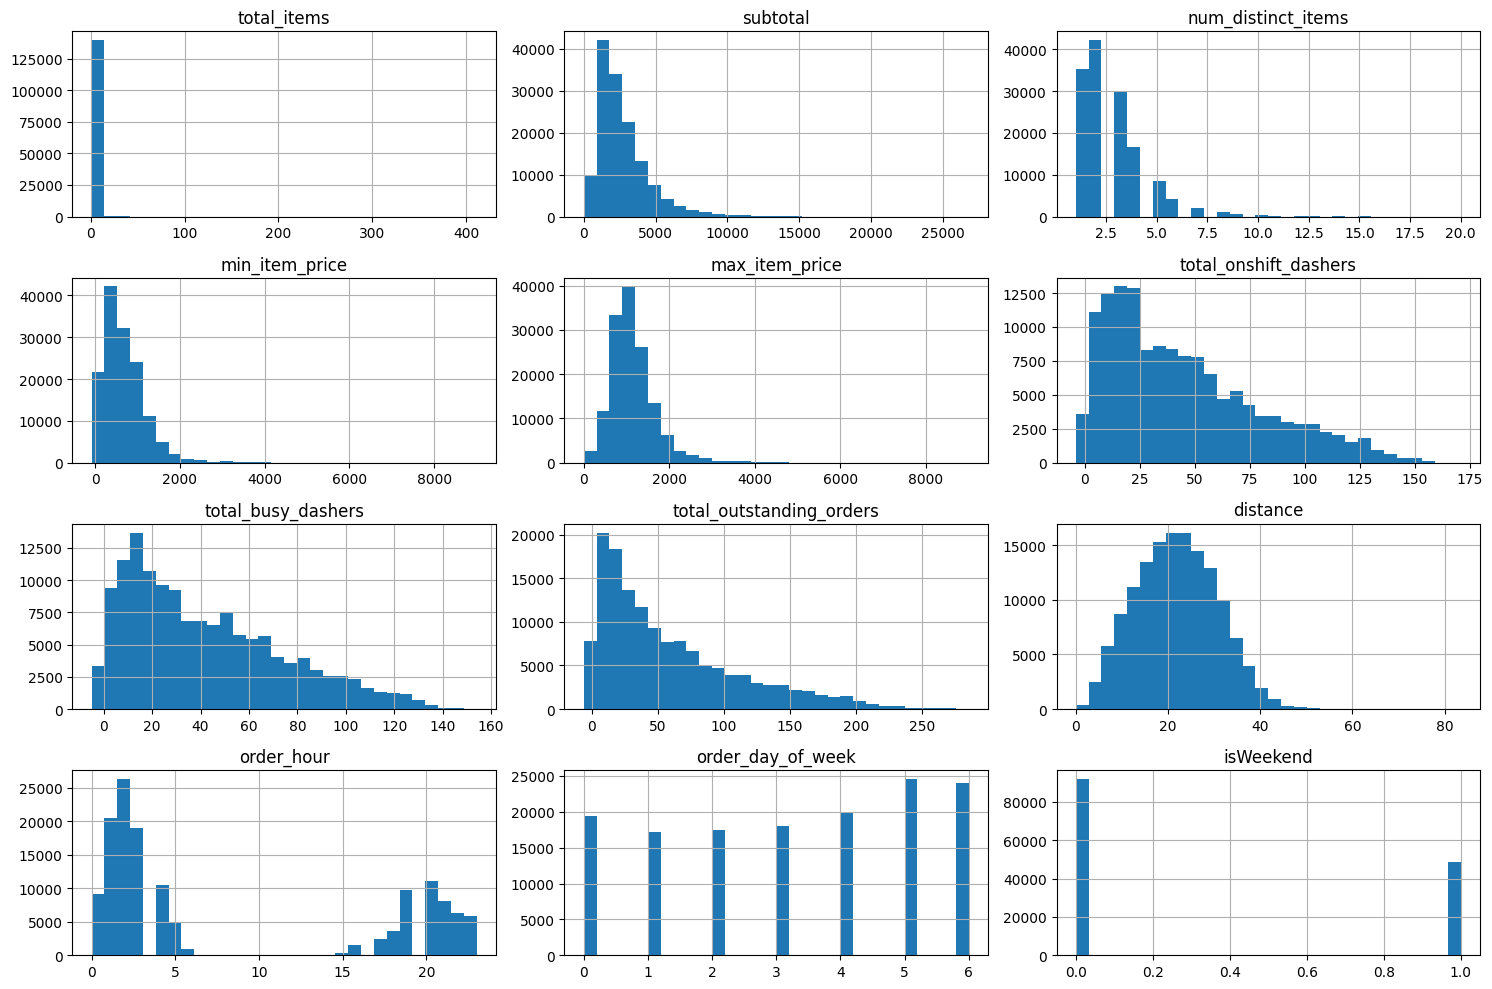

In [11]:
# Plot distributions for all numerical columns
X_train[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [12]:
# Distribution of categorical columns
for col in categorical_cols:
    sns.countplot(x=col, data=X_train)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

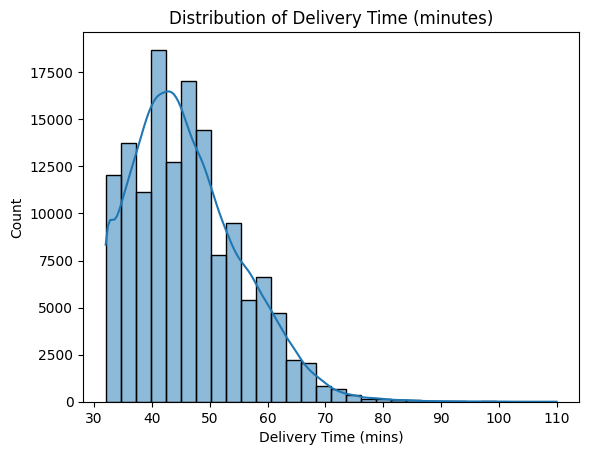

In [13]:
# Distribution of time_taken
sns.histplot(y_train, bins=30, kde=True)
plt.title('Distribution of Delivery Time (minutes)')
plt.xlabel('Delivery Time (mins)')
plt.show()



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

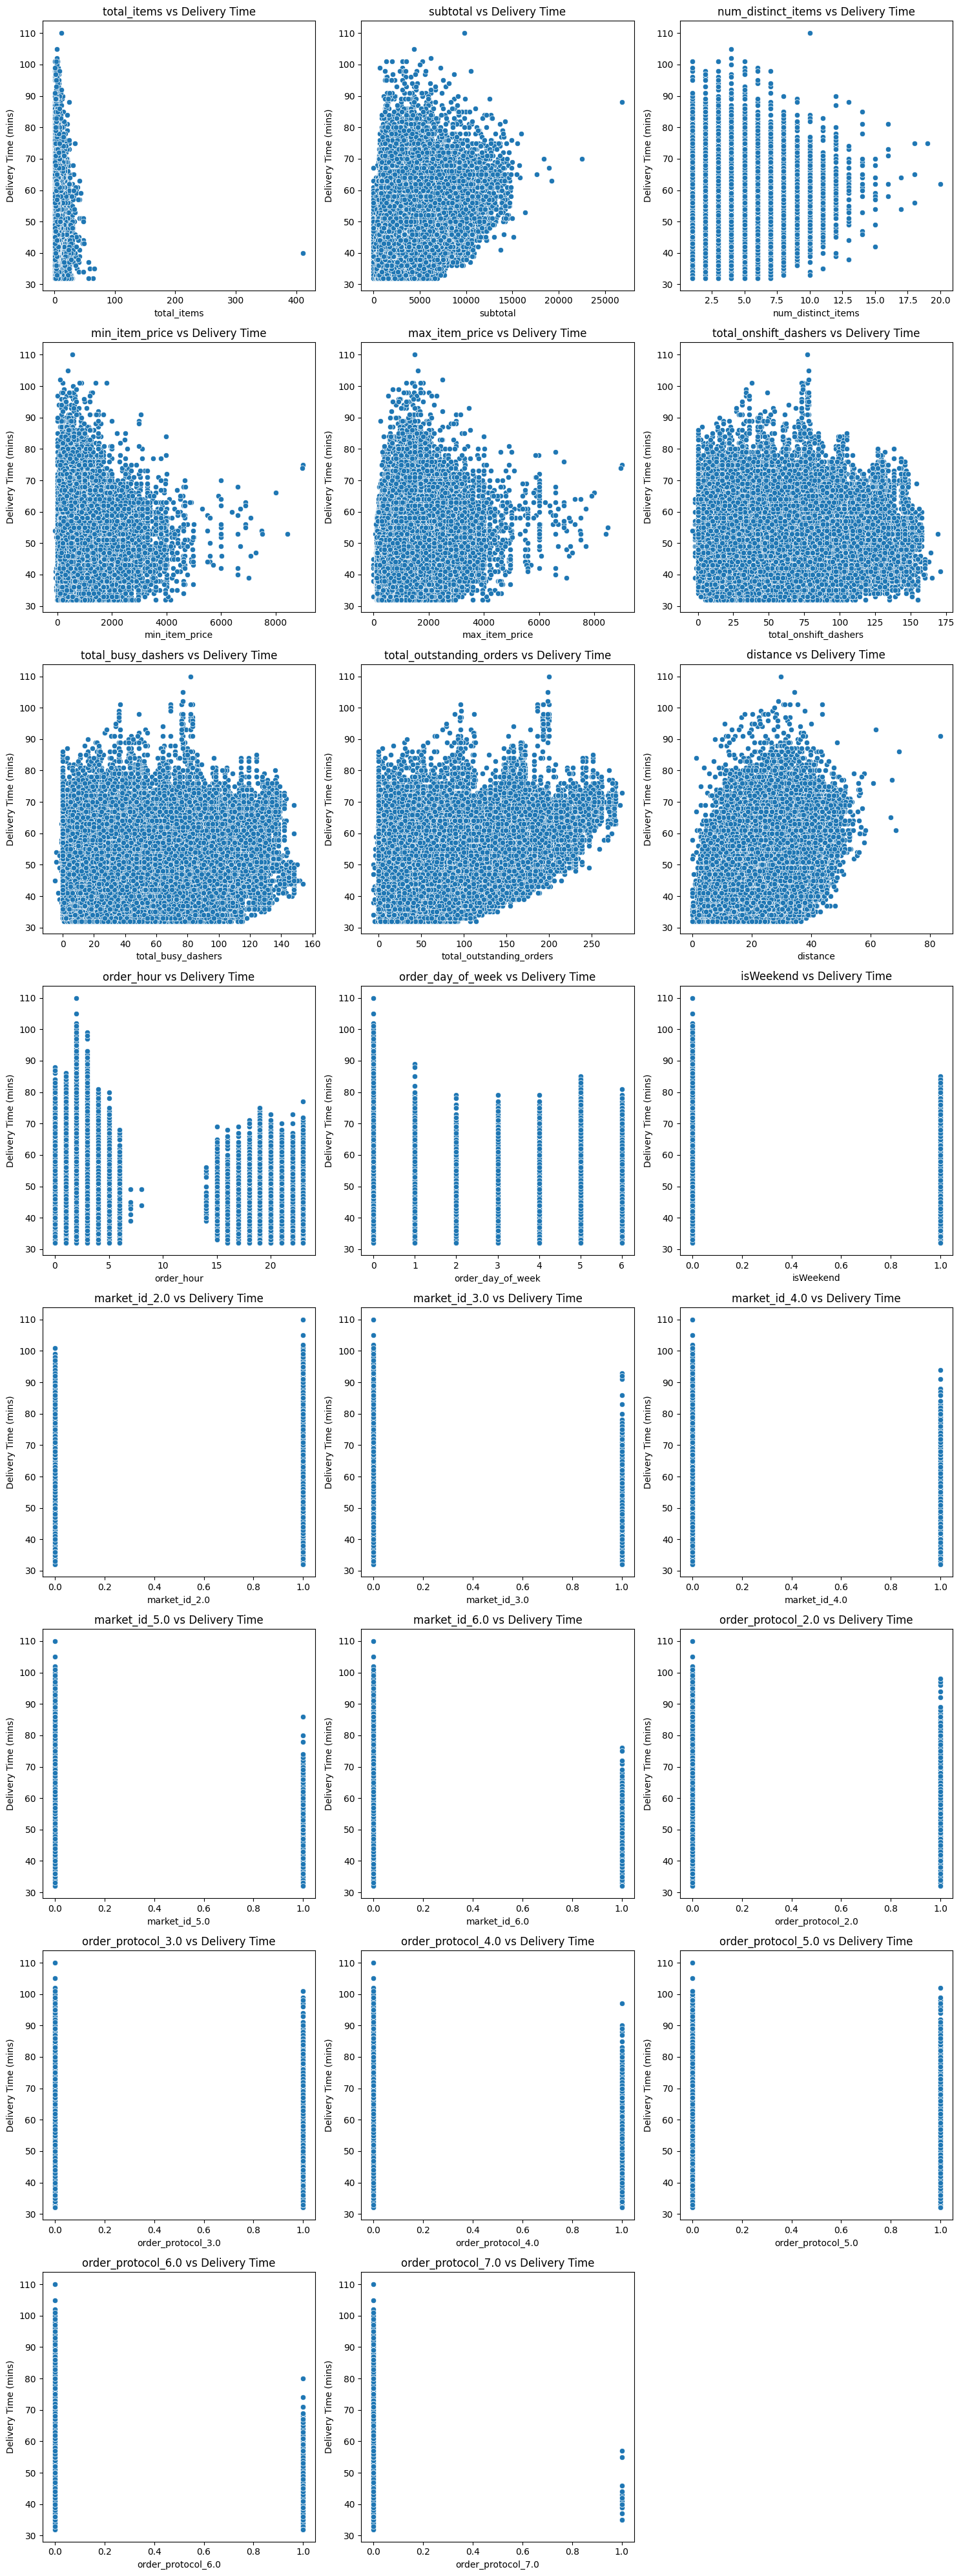

In [14]:
# Scatter plot to visualise the relationship between time_taken and other features
num_cols = len(numerical_cols)
cols = 3  # Number of columns in the subplot grid
rows = (num_cols // cols) + (num_cols % cols > 0)  # Calculate rows dynamically

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Adjust size
axes = axes.flatten()  # Flatten for easy iteration

# Plot each scatter plot in a subplot
for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=X_train[col], y=y_train, ax=axes[i])
    axes[i].set_title(f'{col} vs Delivery Time')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Delivery Time (mins)')

# Remove empty subplots if num_cols isn't a perfect multiple of `cols`
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


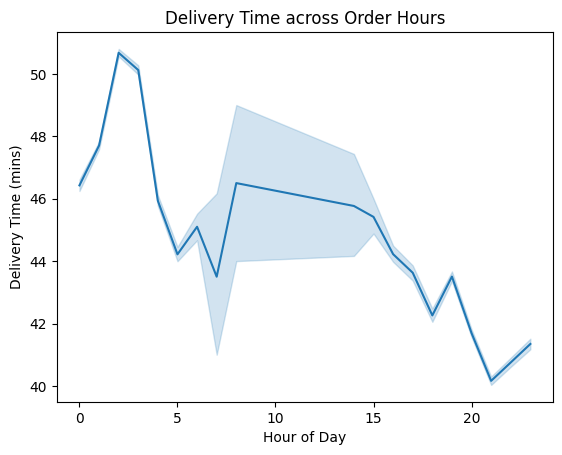

In [15]:
# Show the distribution of time_taken for different hours
sns.lineplot(x=X_train['order_hour'], y=y_train)
plt.title('Delivery Time across Order Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time (mins)')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

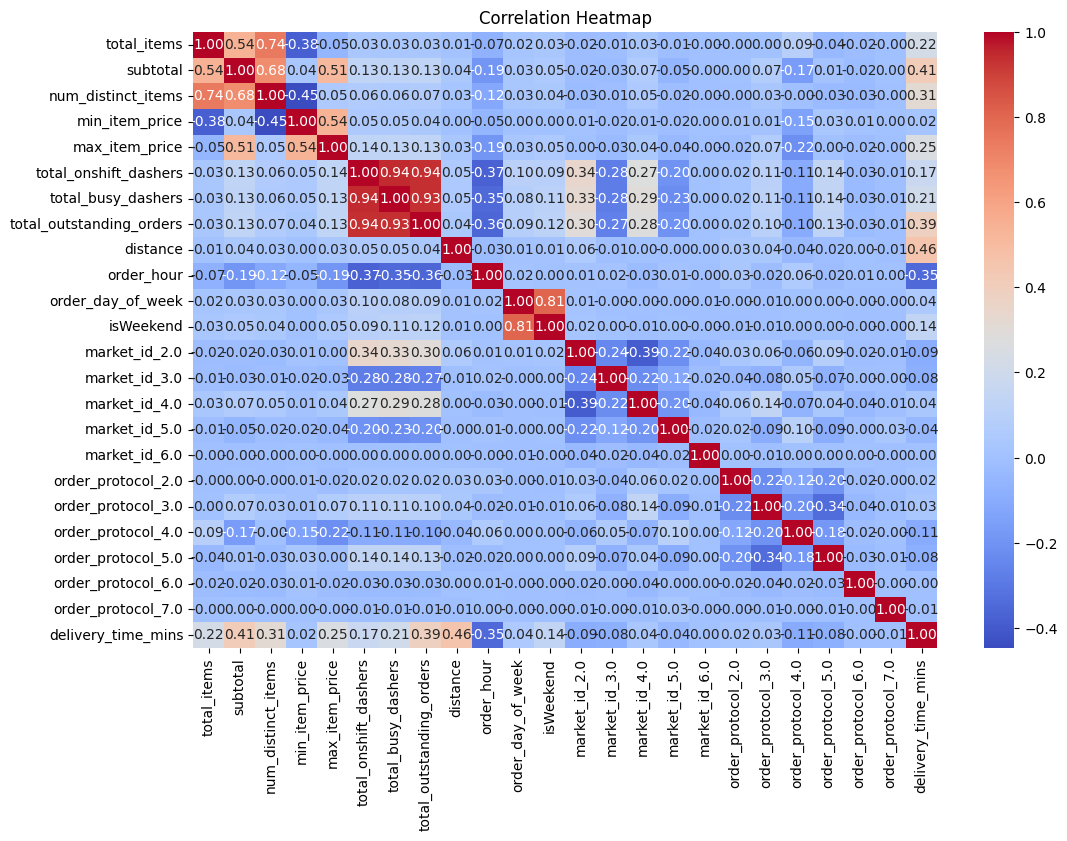

In [16]:
# Plot the heatmap of the correlation matrix
train_corr_df = X_train.copy()
train_corr_df['delivery_time_mins'] = y_train

corr_matrix = train_corr_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [17]:
weak_corr = [
    'min_item_price',
    'order_day_of_week',
    'market_id_4.0',
    'market_id_5.0',
    'market_id_6.0',
    'order_protocol_2.0',
    'order_protocol_3.0',
    'order_protocol_6.0',
    'order_protocol_7.0',
    'total_items',
    'total_busy_dashers'
]
X_train.drop(columns=weak_corr, inplace=True)
X_test.drop(columns=weak_corr, inplace=True)


In [18]:

new_numerical_cols = [x for x in numerical_cols if (x not in weak_corr)]
print(new_numerical_cols)

['subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend', 'market_id_2.0', 'market_id_3.0', 'order_protocol_4.0', 'order_protocol_5.0']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [19]:
# Boxplot for time_taken
num_cols = len(new_numerical_cols) + 1  # +1 for y_train boxplot
cols = 3  # Number of columns in the grid
rows = (num_cols // cols) + (num_cols % cols > 0)  # Calculate required rows

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten for easy iteration

# Plot Boxplot for Delivery Time (y_train)
sns.boxplot(y=y_train, ax=axes[0])
axes[0].set_title('Boxplot of Delivery Time (mins)')

# Plot Boxplots for numerical features
for i, col in enumerate(new_numerical_cols, start=1):
    sns.boxplot(x=X_train[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove empty subplots if num_cols isn't a perfect multiple of `cols`
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [20]:
# Handle outliers
def remove_outliers_iqr(df, columns):
    numerical_columns = [col for col in columns if df[col].dtype in ['int64', 'float64']]
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

train_df = X_train.copy()
train_df['delivery_time_mins'] = y_train

train_df_clean = remove_outliers_iqr(train_df, new_numerical_cols + ['delivery_time_mins'])

X_train = train_df_clean.drop('delivery_time_mins', axis=1)
y_train = train_df_clean['delivery_time_mins']

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [21]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [22]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [23]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [24]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [25]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [26]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [27]:
# Import libraries
import statsmodels.api as sm
from sklearn.feature_selection import RFE


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [28]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [29]:
# Create/Initialise the model
X_train_sm = sm.add_constant(X_train_scaled)  # Add constant term for intercept
ols_model = sm.OLS(y_train, X_train_sm).fit()

In [30]:
# Train the model using the training data
print(ols_model.summary())
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_vif = X_train_scaled
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False))

                            OLS Regression Results                            
Dep. Variable:     delivery_time_mins   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 5.717e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:20:26   Log-Likelihood:            -3.0633e+05
No. Observations:              120744   AIC:                         6.127e+05
Df Residuals:                  120731   BIC:                         6.128e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [31]:
# Make predictions
X_test_sm = sm.add_constant(X_test_scaled)
y_pred = ols_model.predict(X_test_sm)

In [32]:
# Find results for evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


MSE: 12.48, RMSE: 3.53, MAE: 2.41, R²: 0.86


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [33]:
# Loop through the number of features and test the model
for i in range(1, len(X_train_scaled.columns) + 1):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(X_train_scaled, y_train)

    selected_features = X_train_scaled.columns[rfe.support_]

    # Build model with selected features
    X_train_rfe = sm.add_constant(X_train_scaled[selected_features])
    rfe_model = sm.OLS(y_train, X_train_rfe).fit()

    X_test_rfe = sm.add_constant(X_test_scaled[selected_features])
    y_pred_rfe = rfe_model.predict(X_test_rfe)

    # Evaluate R² and RMSE
    rmse_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
    r2_rfe = r2_score(y_test, y_pred_rfe)

    print(f"Features: {i} | RMSE: {rmse_rfe:.2f} | R²: {r2_rfe:.2f}")



Features: 1 | RMSE: 8.80 | R²: 0.12
Features: 2 | RMSE: 7.06 | R²: 0.43
Features: 3 | RMSE: 5.61 | R²: 0.64
Features: 4 | RMSE: 4.37 | R²: 0.78
Features: 5 | RMSE: 3.84 | R²: 0.83
Features: 6 | RMSE: 3.75 | R²: 0.84
Features: 7 | RMSE: 3.66 | R²: 0.85
Features: 8 | RMSE: 3.63 | R²: 0.85
Features: 9 | RMSE: 3.58 | R²: 0.85
Features: 10 | RMSE: 3.56 | R²: 0.86
Features: 11 | RMSE: 3.55 | R²: 0.86
Features: 12 | RMSE: 3.53 | R²: 0.86


In [34]:
# Build the final model with selected number of features
model = LinearRegression()
rfe_final = RFE(model, n_features_to_select=8)
rfe_final.fit(X_train_scaled, y_train)

final_features = X_train_scaled.columns[rfe_final.support_].tolist()
print("Selected Features (Top 8):", final_features)

# Build and fit final model using statsmodels
X_train_final = sm.add_constant(X_train_scaled[final_features])
final_ols_model = sm.OLS(y_train, X_train_final).fit()
print(final_ols_model.summary())



Selected Features (Top 8): ['subtotal', 'total_onshift_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend', 'market_id_2.0', 'order_protocol_5.0']
                            OLS Regression Results                            
Dep. Variable:     delivery_time_mins   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 7.992e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:20:31   Log-Likelihood:            -3.0993e+05
No. Observations:              120744   AIC:                         6.199e+05
Df Residuals:                  120735   BIC:                         6.200e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

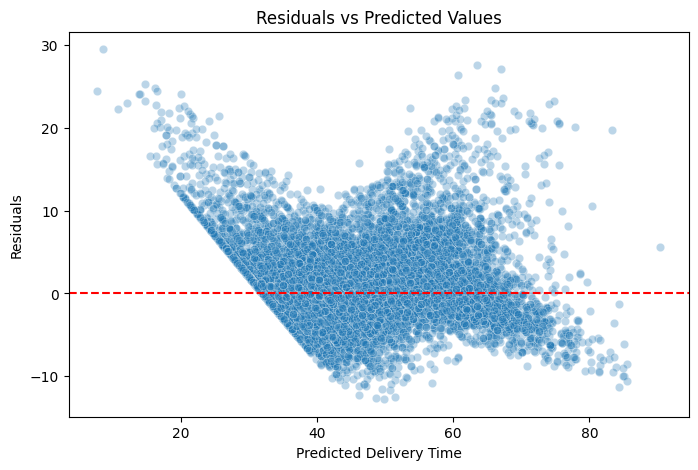

<Figure size 600x600 with 0 Axes>

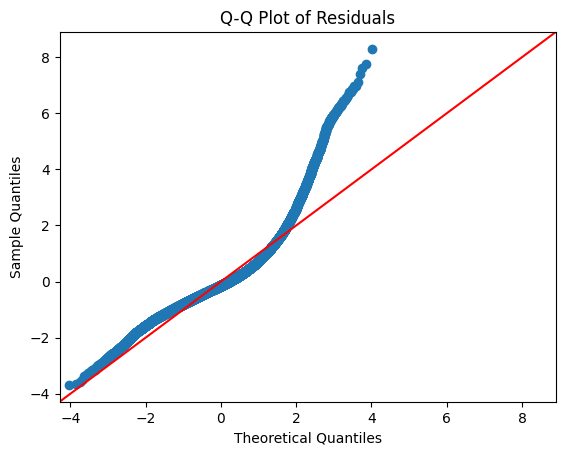

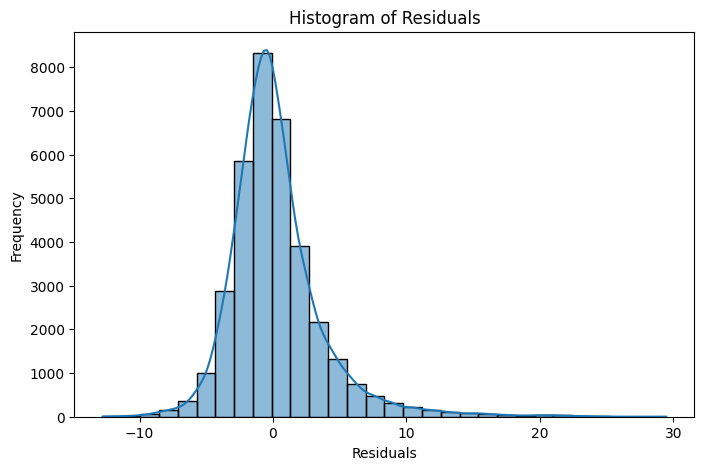

In [35]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_pred

#residuals vs Predicted Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Delivery Time')
plt.ylabel('Residuals')
plt.show()

#Q-Q Plot using statsmodels
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

#Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


[Your inferences here:]


Strengths:

The R-squared of 0.84 is impressive, indicating the model explains 84% of the variance in delivery time. The residuals are centered around 0, which is good for unbiased predictions.

Issues:

Heteroscedasticity: The funnel shape in the residuals vs. predicted values plot suggests non-constant variance.

Non-Normality: The S-shaped Q-Q plot and skewed histogram indicate residuals are not normally distributed.

Multicollinearity : Its still there as VIF of two features are moderate (>5 and <10)

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [36]:
# Compare the scaled vs unscaled features used in the final model
scaled_coeffs = final_ols_model.params[1:]
print("Scaled Coefficients:\n", scaled_coeffs)

feature_stds = pd.Series(scaler.scale_, index=X_train.columns)

unscaled_coeffs = scaled_coeffs * feature_stds[scaled_coeffs.index]
print("\nUnscaled Coefficients:\n", unscaled_coeffs)


Scaled Coefficients:
 subtotal                     2.120557
total_onshift_dashers      -13.209131
total_outstanding_orders    13.723063
distance                     4.044620
order_hour                  -1.990761
isWeekend                    0.659545
market_id_2.0               -0.919086
order_protocol_5.0          -0.785571
dtype: float64

Unscaled Coefficients:
 subtotal                    2660.741198
total_onshift_dashers       -405.790247
total_outstanding_orders     599.151298
distance                      34.868534
order_hour                   -17.581470
isWeekend                      0.309678
market_id_2.0                 -0.418612
order_protocol_5.0            -0.333358
dtype: float64


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [37]:
# Analyze the effect of a unit change in a feature, say 'total_items'
feature = 'subtotal'
coef_scaled = 2.120557
std_original = feature_stds[feature]  # Use actual std from scaler
effect = coef_scaled * std_original
print(f"Effect of a unit increase in subtotal: {effect:.2f} minutes")


Effect of a unit increase in subtotal: 2660.74 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, categorical variables include store_primary_category, market_id, and order_protocol. After encoding, analysis showed that market_id_2.0 and order_protocol_5.0 had statistically significant coefficients.
\
market_id_2.0: deliveries in this market are ~0.42 mins faster.
\
order_protocol_5.0: this method reduced delivery time by ~0.33 mins.
Thus, order method and location affect delivery efficiency.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size=0.2 means 20% of the data is used for testing, and 80% for training. This ensures model evaluation on unseen data for accurate performance measurement.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>From the heatmap, distance had the highest positive correlation with delivery time, indicating longer distances result in higher delivery times.





---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Used boxplots and calculated IQR (Interquartile Range) to detect outliers in numerical features. using these as lower and upperbound.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>total_outstanding_orders,distance,total_onshift_dashers



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression models the relationship between independent variables (X) and a dependent variable (y) using the equation:
y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε
It estimates coefficients (β) by minimizing the residual sum of squares (RSS) between predicted and actual values using Ordinary Least Squares (OLS). It assumes linearity, homoscedasticity, normality of errors, and no multicollinearity.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression: One independent variable (X), one dependent (y).
\
Multiple Linear Regression: Two or more independent variables (X₁, X₂, ...), predicting a single dependent variable (y).
Multiple regression captures complex relationships between multiple features and target.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function measures prediction error. In linear regression, it’s the Mean Squared Error (MSE).
Minimization: Using Ordinary Least Squares (OLS) or Gradient Descent, the algorithm adjusts coefficients to minimize MSE, improving model accuracy.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting: Model captures noise and performs well on training but poorly on test data.
\
Underfitting: Model is too simple, fails to learn patterns, performs poorly on both training and test data.
Ideal models balance complexity to generalize well.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual vs Predicted Plot: Detects non-linearity and heteroscedasticity (patterns = issues).
\
Q-Q Plot: Checks if residuals follow a normal distribution (assumption of linear regression).
\
Histogram: Visualizes residual spread and skewness.